In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 4)

In [6]:
# 讀取資料
df_no = pd.read_csv("data_no_corr.csv")
df_positive = pd.read_csv("data_positive_corr.csv")
df_negative = pd.read_csv("data_negative_corr.csv")

# 檢視三個資料集 K, T 的相關性
print( "no corr: {:.4f}".format( np.corrcoef(df_no["K"],df_no["T"])[0][1]) )
print( "positive corr: {:.4f}".format( np.corrcoef(df_positive["K"],df_positive["T"])[0][1]))
print( "negative corr: {:.4f}".format( np.corrcoef(df_negative["K"],df_negative["T"])[0][1])) 
df_no #.head()

no corr: 0.0000
positive corr: 0.2575
negative corr: -0.2584


,S,K,r,q,sigma,T,Call,Put,Forward,S2
0,70,80,0.0,0.05,0.1,0.0,0.000000,10.000000,70.000000,4900
1,70,80,0.0,0.05,0.1,0.1,0.000003,10.349129,69.650874,4900
...,...,...,...,...,...,...,...,...,...,...
309580,130,120,0.1,0.05,0.5,1.9,39.705938,20.722553,142.955651,16900
309581,130,120,0.1,0.05,0.5,2.0,40.435913,21.054739,143.672219,16900


# **1. 試驗一 缺失K、T**

$$
\begin{align}
   model \space 0: C, P &= \beta_{0} + \beta_{1} K + \beta_{2} T  \\
   model \space 1: C, P &= \beta_{0} + \beta_{1} K  \\
   model \space 2: C, P &= \beta_{0} + \beta_{1} T 
\end{align} 
$$

試驗一: 探討缺失K、T的選擇權迴歸模型(模擬資料)

若於模型中遺漏到期日T或履約價K ，並且K和T有相關性，其迴歸估計結果將產生偏誤

固定S = 100, r = 0.1, σ = 0.3

## 以 K,T 正相關樣本為例

[[1.         0.25899719]
 [0.25899719 1.        ]]


,S,K,r,q,sigma,T,Call,Put,Forward,S2
17044,100,80,0.1,0.05,0.3,0.0,20.000000,0.000000,100.000000,10000
17045,100,80,0.1,0.05,0.3,0.1,20.319819,0.022558,100.501252,10000
...,...,...,...,...,...,...,...,...,...,...
19592,100,120,0.1,0.05,0.3,1.9,11.767333,20.065136,109.965885,10000
19593,100,120,0.1,0.05,0.3,2.0,12.263937,20.027886,110.517092,10000


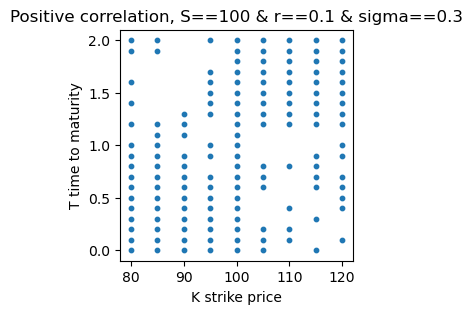

In [8]:
test1 = df_positive.query("S==100 & r==0.1 & sigma==0.3")
print( np.corrcoef(test1["K"], test1["T"]))
plt.figure(figsize=(3, 3))
plt.scatter(test1["K"], test1["T"], s=10)
plt.xlabel("K strike price")
plt.ylabel("T time to maturity")
plt.title("Positive correlation, S==100 & r==0.1 & sigma==0.3")
test1

In [9]:
# 試驗一 - 正確模型0
model1_0 = sm.OLS(test1["Call"], sm.add_constant( test1[["K","T"]] )).fit()
summary = model1_0.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   Call   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1173.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           6.45e-87
Time:                        18:07:16   Log-Likelihood:                -261.56
No. Observations:                 140   AIC:                             529.1
Df Residuals:                     137   BIC:                             538.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.2489      1.056     51.359      0.0

In [10]:
# 試驗一 - 缺失模型1
model1_1 = sm.OLS(test1["Call"], sm.add_constant( test1[["K"]] )).fit()
summary = model1_1.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   Call   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     167.2
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.48e-25
Time:                        18:07:16   Log-Likelihood:                -408.80
No. Observations:                 140   AIC:                             821.6
Df Residuals:                     138   BIC:                             827.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.3851      3.008     17.416      0.0

In [11]:
# 試驗一 - 缺失模型2
model1_2 = sm.OLS(test1["Call"], sm.add_constant( test1[["T"]] )).fit()
summary = model1_2.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   Call   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     29.02
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           3.01e-07
Time:                        18:07:16   Log-Likelihood:                -451.01
No. Observations:                 140   AIC:                             906.0
Df Residuals:                     138   BIC:                             911.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3666      0.972      9.637      0.0

## 公式計算Bias

利用公式計算缺失模型1裡，T的beta係數的bias，並對照a.的結果

$$
\begin{align}
   model \space 0: C, P &= \beta_{0} + \beta_{1} K + \beta_{2} T  \\
   model \space 1: C, P &= \beta_{0} + \beta_{1} K \\
   model \space T :  T &=  \beta_{0} + \beta_{1} K
\end{align} 
$$

$$
Bias( \tilde{\beta_1} ) = \hat{\beta_2}   \tilde{\delta _1}  
$$

In [12]:
# 試驗一 b. 找出缺失模型1的bias  缺T
model_T = sm.OLS(test1["T"], sm.add_constant( test1[["K"]] )).fit()
summary = model_T.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      T   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     9.923
Date:                Tue, 05 Mar 2024   Prob (F-statistic):            0.00200
Time:                        18:07:16   Log-Likelihood:                -126.01
No. Observations:                 140   AIC:                             256.0
Df Residuals:                     138   BIC:                             261.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2639      0.399     -0.661      0.5

In [13]:
print("正確模型0 beta K:", model1_0.params["K"])
print("缺失模型1(缺T) beta K:", model1_1.params["K"])
print("TK回歸模型 beta K:", model_T.params["K"])
# 用公式算bias
print("\nbias of beta K:",  model1_1.params["K"] - model1_0.params["K"])
print("bias of beta K, 公式:", model1_0.params["T"] * model_T.params["K"])

正確模型0 beta K: -0.4740513312156913
缺失模型1(缺T) beta K: -0.3859613051554056
TK回歸模型 beta K: 0.012471821715389582

bias of beta K: 0.08809002606028571
bias of beta K, 公式: 0.08809002606028551


# **2. 試驗二 缺失sigma**

$$
\begin{align}
   model \space 0: C, P &= \beta_{0} + \beta_{1} K + \beta_{2} T + \beta_{3} \sigma  \\
   model \space 1: C, P &= \beta_{0} + \beta_{1} K + \beta_{2} T 
\end{align} 
$$

試驗二: 探討缺失sigma的選擇權迴歸模型(模擬資料)

若於模型中遺漏波動率σ ，σ分別與K、T無相關性，即使K和T有相關性，其對K、T迴歸估計結果無產生偏誤，但在const會有偏誤，且R-squared下降。

固定S = 100, r = 0.1

## 以 K,T 無相關樣本為例

In [14]:
test2 = df_no.query("S==100 & r==0.1")
test2

,S,K,r,q,sigma,T,Call,Put,Forward,S2
145089,100,80,0.1,0.05,0.1,0.0,20.000000,0.000000e+00,100.000000,10000
145090,100,80,0.1,0.05,0.1,0.1,20.297261,9.947600e-14,100.501252,10000
...,...,...,...,...,...,...,...,...,...,...
166696,100,120,0.1,0.05,0.5,1.9,21.684214,2.998202e+01,109.965885,10000
166697,100,120,0.1,0.05,0.5,2.0,22.362923,3.012687e+01,110.517092,10000


In [15]:
# 試驗二 - 正確模型0
model2_0 = sm.OLS(test2["Call"], sm.add_constant( test2[["K","T","sigma"]] )).fit()
summary = model2_0.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   Call   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.743e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:07:16   Log-Likelihood:                -8839.4
No. Observations:                3969   AIC:                         1.769e+04
Df Residuals:                    3965   BIC:                         1.771e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6192      0.298    153.166      0.0

In [16]:
# 試驗二 - 缺失模型1
model2_1 = sm.OLS(test2["Call"], sm.add_constant( test2[["K","T"]] )).fit()
summary = model2_1.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   Call   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     6279.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:07:16   Log-Likelihood:                -11271.
No. Observations:                3969   AIC:                         2.255e+04
Df Residuals:                    3966   BIC:                         2.257e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.2396      0.525    103.340      0.0

# **3. 試驗三 價性探討**

a. 利用無相關性樣本(data_no_corr)，固定S=100、sigma=0.3、r=0.1，並將樣本區分成兩種價性:價內、價外，再分別做試驗一中的三種模型，Y為Call和Put的模型皆須完成 (應產生12個回歸結果)

$$
\begin{align}
   model \space 0: C, P &= \beta_{0} + \beta_{1} K + \beta_{2} T  \\
   model \space 1: C, P &= \beta_{0} + \beta_{1} K  \\
   model \space 2: C, P &= \beta_{0} + \beta_{1} T 
\end{align} 
$$


b. 比較K係數、R2，有什麼差異? 原因為何? (可參考下圖進行解釋)

c. 比較T係數，有什麼差異? 代表什麼意義?  (可參考下圖進行解釋，此題較難)

In [17]:
# function 
def model_result(df, Xlist, Y):
    result = pd.DataFrame(columns=["Y","X","R2"])
    for X in Xlist:
        model = sm.OLS(df[Y], sm.add_constant( df[X] )).fit()
        result = pd.concat( [result, pd.DataFrame(model.params).T], axis=0 ).reset_index(drop=True)
        result["Y"].iloc[-1] = Y
        result["X"].iloc[-1] = X
        result["R2"].iloc[-1] = model.rsquared
    return result

In [18]:
# OTM 價外 - Call
CallOTM = df_no.query("S<K & S==100 & r==0.1 & sigma==0.3")
model_result(CallOTM, [["K","T"], ["K"], ["T"], ], "Call")

,Y,X,R2,const,K,T
0,Call,"[K, T]",0.977348,32.861816,-0.283186,7.264532
1,Call,[K],0.112064,40.126348,-0.283186,NaN
2,Call,[T],0.865284,1.003387,NaN,7.264532


In [ ]:
# ITM 價內 - Call


In [ ]:
# OTM 價外 - Put


In [ ]:
# ITM 價內 - Put


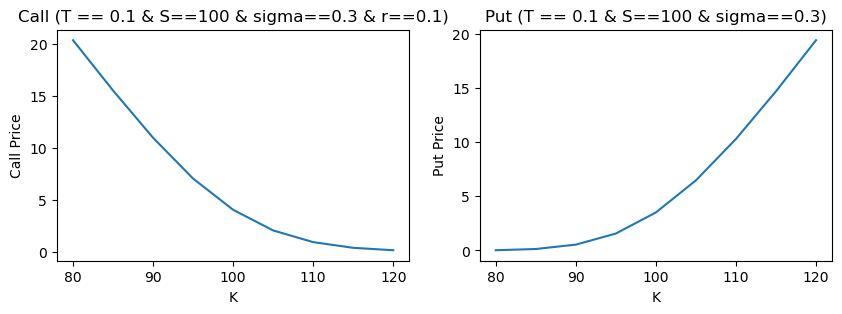

In [20]:
# b. 比較K係數、R2，有什麼差異? 原因為何? (可參考下圖進行解釋)
draw = df_no.query("T == 0.1 & S==100 & sigma==0.3 & r==0.1")
fig, ax = plt.subplots(1,2, figsize=(10,3)) 
ax[0].set_xlabel("K")
ax[0].set_ylabel("Call Price")
ax[0].set_title("Call (T == 0.1 & S==100 & sigma==0.3 & r==0.1)")
ax[0].plot(draw["K"], draw["Call"])

ax[1].set_xlabel("K")
ax[1].set_ylabel("Put Price")
ax[1].set_title("Put (T == 0.1 & S==100 & sigma==0.3)")
ax[1].plot(draw["K"], draw["Put"])

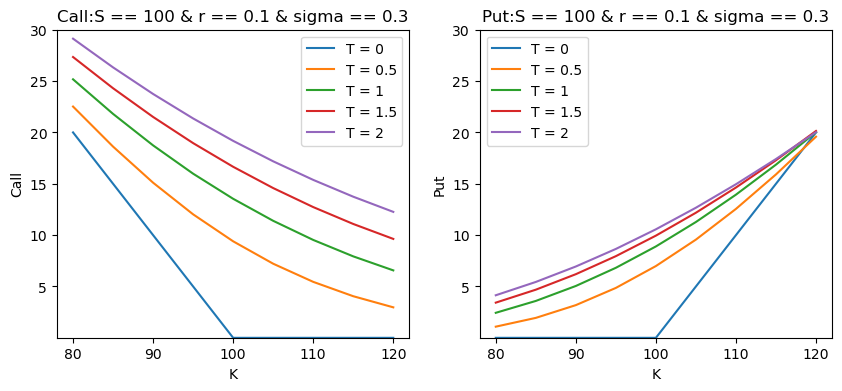

In [21]:
# c. 比較T係數，有什麼差異? 代表什麼意義?
filt_str = "S == 100 & r == 0.1 & sigma == 0.3" # r、sigma不同，會影響T係數
filt = df_no.query(filt_str)
fig, ax = plt.subplots(1,2, figsize=(10,4)) 

for t_value in [0, 0.5, 1, 1.5, 2]:
    subset = filt[filt["T"] == t_value]
    ax[0].plot(subset["K"], subset["Call"], label=f"T = {t_value}")

for t_value in [0, 0.5, 1, 1.5, 2]:
    subset = filt[df_no["T"] == t_value]
    ax[1].plot(subset["K"], subset["Put"], label=f"T = {t_value}")

ax[0].set_xlabel("K")
ax[0].set_ylabel("Call")
ax[0].set_title("Call:"+filt_str)
ax[0].legend()
ax[0].set_ylim(0.01, 30)

ax[1].set_xlabel("K")
ax[1].set_ylabel("Put")
ax[1].set_title("Put:"+filt_str)
ax[1].legend()
ax[1].set_ylim(0.01, 30)
plt.show()